# Linear Regression Bike Sharing Case Study

## Data Understanding
1. Problem Statement
2. Business Goal
3. Data Description
4. Model Building

### 1. Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know.

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors

### 2. Business Goal
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

### 3. Dataset Description
This dataset contains information about bike rentals, with the following features:

- **instant**: Record index
- **dteday**: Date
- **season**: Season
  - 1: Spring
  - 2: Summer
  - 3: Fall
  - 4: Winter
- **yr**: Year
  - 0: 2018
  - 1: 2019
- **mnth**: Month (1 to 12)
- **holiday**: Indicates if the weather day is a holiday (1: Yes, 0: No)
- **weekday**: Day of the week
- **workingday**: Indicates if the day is neither a weekend nor a holiday
  - 1: Yes
  - 0: No
- **weathersit**: Weather situation
  - 1: Clear, Few clouds, Partly cloudy
  - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- **temp**: Temperature in Celsius
- **atemp**: Feeling temperature in Celsius
- **hum**: Humidity
- **windspeed**: Wind speed
- **casual**: Count of casual users
- **registered**: Count of registered users
- **cnt**: Count of total rental bikes (including both casual and registered users)

### 4. Model Building
In the dataset provided, you will notice that there are three columns named 'casual', 'registered', and 'cnt'. The variable 'casual' indicates the number casual users who have made a rental. The variable 'registered' on the other hand shows the total number of registered users who have made a booking on a given day. Finally, the 'cnt' variable indicates the total number of bike rentals, including both casual and registered. **The model should be built taking this 'cnt' as the target variable**.

## Outline

1. Reading, Understanding and Visualizing the Data
  
2. Exploratory Data Analysis (EDA)

3. Data Preparation

4. Splitting the Data and Rescaling
   
5. Training the Model

6. Residual Analysis
   
7. Making Predictions

8. Model Evaluation

### 1. Reading, Understanding, and Visualizing the Data

In [1]:
# Import necessaries libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import warnings

# Ignoring the warnings
warnings.filterwarnings('ignore')

#configuring max rows and columns to display
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 100)

#configuring to display all decimal values upto 2 decimal precision
pd.options.display.float_format = '{:.2f}'.format

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

#### Load data from day.csv

In [4]:
raw_bike_data = pd.read_csv('day.csv')
raw_bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.11,18.18,80.58,10.75,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.90,17.69,69.61,16.65,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.05,9.47,43.73,16.64,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.20,10.61,59.04,10.74,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.31,11.46,43.70,12.52,82,1518,1600


In [5]:
# understand data shape (number_of_rows, number_of_columns)
raw_bike_data.shape

(730, 16)

#### Checking for Null values

In [6]:
#displaying columns with number of null values
raw_bike_data.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

##### There are no missing values in the data

#### Checking for Unique Values

In [7]:
raw_bike_data.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

#### Droping Columns
1. **instant**: Its index of all instances so thi field is not required for analysis as it adds no significant value
2. **dteday**: Its a date time field which has already been segregated to month, year and weekday
3. **casual** and **registered**: Combine values of both is already present in **cnt**

In [8]:
#List of columns to drop
columns_to_drop = [
    'instant', 'dteday', 'casual', 'registered'
]

#dropping those columns
raw_bike_data = raw_bike_data.drop(columns = columns_to_drop)

In [9]:
#Check Dataframe shape
raw_bike_data.shape

(730, 12)

In [10]:
raw_bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [11]:
clean_bike_data = raw_bike_data
clean_bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.11,18.18,80.58,10.75,985
1,1,0,1,0,0,0,2,14.90,17.69,69.61,16.65,801
2,1,0,1,0,1,1,1,8.05,9.47,43.73,16.64,1349
3,1,0,1,0,2,1,1,8.20,10.61,59.04,10.74,1562
4,1,0,1,0,3,1,1,9.31,11.46,43.70,12.52,1600


In [12]:
clean_bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


#### Checking for Duplicate Values

In [13]:
clean_bike_data[clean_bike_data.duplicated()]
clean_bike_data.shape

(730, 12)

##### There are no Duplicate Values

#### Converting Categorical fields to suitable values

In [14]:
#Converting month values to text with three initials using datetime function
clean_bike_data['mnth'] = pd.to_datetime(clean_bike_data['mnth'], format='%m').dt.strftime('%b')
clean_bike_data['mnth'].value_counts()

mnth
Jan    62
Mar    62
May    62
Jul    62
Aug    62
Oct    62
Dec    62
Apr    60
Jun    60
Sep    60
Nov    60
Feb    56
Name: count, dtype: int64

In [15]:
#Mapping and Converting weekday values to text with three initials
weekday_map = {
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
}

clean_bike_data['weekday'] = clean_bike_data['weekday'].map(weekday_map)
clean_bike_data['weekday'].value_counts()

weekday
Sat    105
Sun    105
Mon    105
Tue    104
Thu    104
Fri    104
Wed    103
Name: count, dtype: int64

In [16]:
#Replacing season values to text
clean_bike_data.season.replace({1:"Spring", 2:"Summer", 3:"Fall", 4:"Winter"},inplace = True)
clean_bike_data['season'].value_counts()

season
Fall      188
Summer    184
Spring    180
Winter    178
Name: count, dtype: int64

In [17]:
#Replacing weather values to text
clean_bike_data.weathersit.replace({1:'Good', 2:'Moderate', 3:'Bad', 4:'Severe'},inplace = True)
clean_bike_data['weathersit'].value_counts()

weathersit
Good        463
Moderate    246
Bad          21
Name: count, dtype: int64

In [18]:
#Replacing year boolean values to years
clean_bike_data.yr.replace({0:2018, 1:2019},inplace = True)
clean_bike_data['yr'].value_counts()

yr
2018    365
2019    365
Name: count, dtype: int64

In [19]:
#Replacing holiday values to text
clean_bike_data.holiday.replace({0:'No', 1:'Yes'},inplace = True)
clean_bike_data['holiday'].value_counts()

holiday
No     709
Yes     21
Name: count, dtype: int64

In [20]:
#Replacing working day values to text
clean_bike_data.workingday.replace({0:'No', 1:'Yes'},inplace = True)
clean_bike_data['workingday'].value_counts()

workingday
Yes    499
No     231
Name: count, dtype: int64

In [21]:
bike_data = clean_bike_data
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,2018,Jan,No,Sat,No,Moderate,14.11,18.18,80.58,10.75,985
1,Spring,2018,Jan,No,Sun,No,Moderate,14.90,17.69,69.61,16.65,801
2,Spring,2018,Jan,No,Mon,Yes,Good,8.05,9.47,43.73,16.64,1349
3,Spring,2018,Jan,No,Tue,Yes,Good,8.20,10.61,59.04,10.74,1562
4,Spring,2018,Jan,No,Wed,Yes,Good,9.31,11.46,43.70,12.52,1600


In [22]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    object 
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    object 
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(2), object(6)
memory usage: 68.6+ KB


#### Common Functions

In [23]:
def create_outlier_boxplot(data, column, title):
    """
    Generalized function to plot a boxplot.

    Parameters:
    - data: DataFrame containing the data.
    - column: Column to plot.
    - title: Title of the plot.
    """

    #create boxplot
    sns.boxplot(y=data[column], palette='pastel')

    #set titles and labels
    plt.title(title)
    plt.ylabel('Values', fontsize=12)

    # Format y-axis with commas
    plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))

In [24]:
def create_boxplot(data, y_column, title, x_column):
    """
    Generalized function to plot a boxplot.

    Parameters:
    - data: DataFrame containing the data.
    - x_column: Column to plot on the x-axis.
    - y_column: Column to plot on the y-axis.
    - title: Title of the plot.
    """
    
    #create boxplot
    sns.boxplot(data=data, x=x_column, y=y_column, palette=palette)

    #set titles and labels
    plt.title(title)
    plt.ylabel('Values', fontsize=12)

    # Format y-axis with commas
    plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))

In [25]:
def create_barplot(data, x_column, y_column, title, xlabel, ylabel, palette, rotation=0):
    """
    Generalized function to plot a lineplot.

    Parameters:
    - data: DataFrame containing the data.
    - x_column: Column to plot on the x-axis.
    - y_column: Column to plot on the y-axis.
    - title: Title of the plot.
    - xlabel: Label for the x-axis.
    - ylabel: Label for the y-axis.
    - palette: Color palette for the plot.
    - rotation: Rotaion for x-label(Default is 0)
    """

    #Show the plot
    sns.barplot(x=x_column, y=y_column, data=data, palette=palette, estimator='median', ci=None)

    #set titles and labels
    plt.title(title)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)

    #set rotaion for x_labels if required
    plt.xticks(rotation=rotation)

    #adjust the layout
    plt.tight_layout()

    #Show the plot
    plt.show()

In [26]:
def create_heatmap(data, title):
    """
    Generalized function to plot a lineplot.

    Parameters:
    - data: DataFrame containing the data.
    - title: Title of the plot.
    """

    #Show the plot
    sns.heatmap(data, annot=True, cmap='coolwarm', linewidths=.5)

    #set title
    plt.title(title)

    #adjust the layout
    plt.tight_layout()

    #Show the plot
    plt.show()

In [27]:
def create_regplot(data, x_column, title):
    """
    Generalized function to plot a lineplot.

    Parameters:
    - data: DataFrame containing the data.
    - x_column: Column to plot on the x-axis.
    - title: Title of the plot.
    """

    #Show the plot
    sns.regplot(data, y="cnt", x=x_column)

    #set title
    plt.title(title)


#### Outlier Treatement

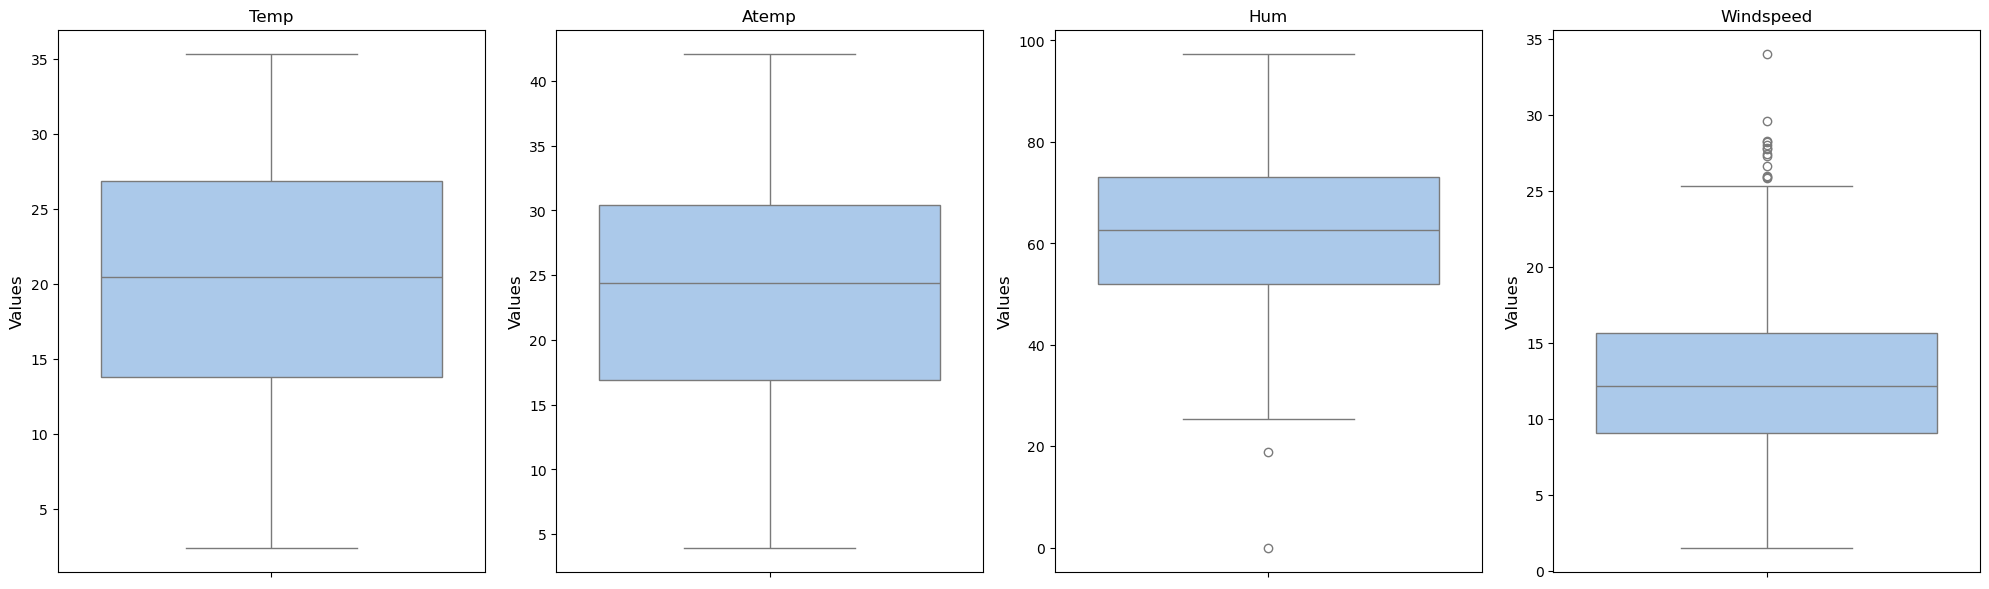

In [28]:
# Draw box plots for indepent variables with continuous values
cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(20, 6))

# Set up the subplots in a single row
for i, col in enumerate(cols, 1):
    plt.subplot(1, len(cols), i)  # 1 row, number of columns based on cols length
    create_outlier_boxplot(bike_data, col, col.title())

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

##### There are no significant outliers

In [29]:
bike_data.describe()

,yr,temp,atemp,hum,windspeed,cnt
count,730.00,730.00,730.00,730.00,730.00,730.00
mean,2018.50,20.32,23.73,62.77,12.76,4508.01
std,0.50,7.51,8.15,14.24,5.20,1936.01
min,2018.00,2.42,3.95,0.00,1.50,22.00
25%,2018.00,13.81,16.89,52.00,9.04,3169.75
50%,2018.50,20.47,24.37,62.62,12.13,4548.50
75%,2019.00,26.88,30.45,72.99,15.63,5966.00
max,2019.00,35.33,42.04,97.25,34.00,8714.00


### 2. EXPLORATORY DATA ANALYSIS (EDA)

In [30]:
#Set common theme for all the graphs
sns.set_theme(style="whitegrid")

#Set common pallet for all the graphs
palette = sns.color_palette("husl", 10) 

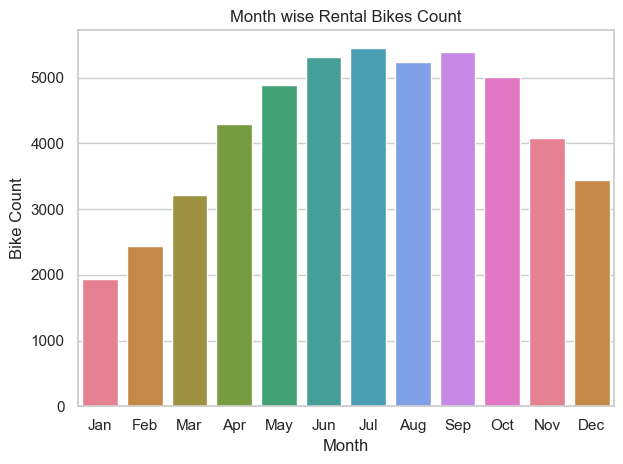

In [31]:
create_barplot(x_column='mnth', y_column='cnt', data=bike_data, title='Month wise Rental Bikes Count', xlabel='Month', 
               ylabel='Bike Count', palette=palette)

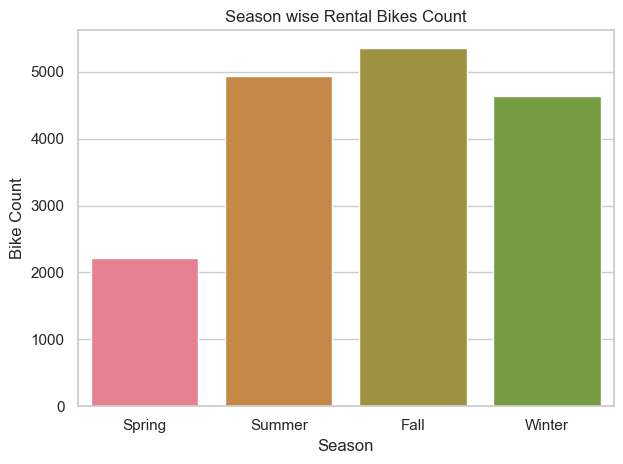

In [32]:
create_barplot(x_column='season', y_column='cnt', data=bike_data, title='Season wise Rental Bikes Count', xlabel='Season', 
               ylabel='Bike Count', palette=palette)

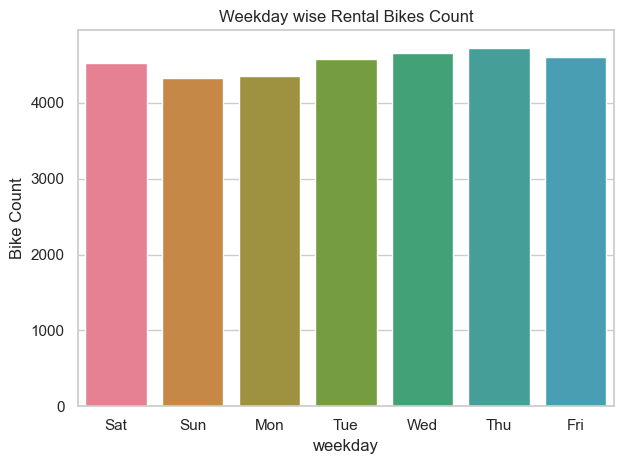

In [33]:
create_barplot(x_column='weekday', y_column='cnt', data=bike_data, title='Weekday wise Rental Bikes Count', xlabel='weekday', 
               ylabel='Bike Count', palette=palette)

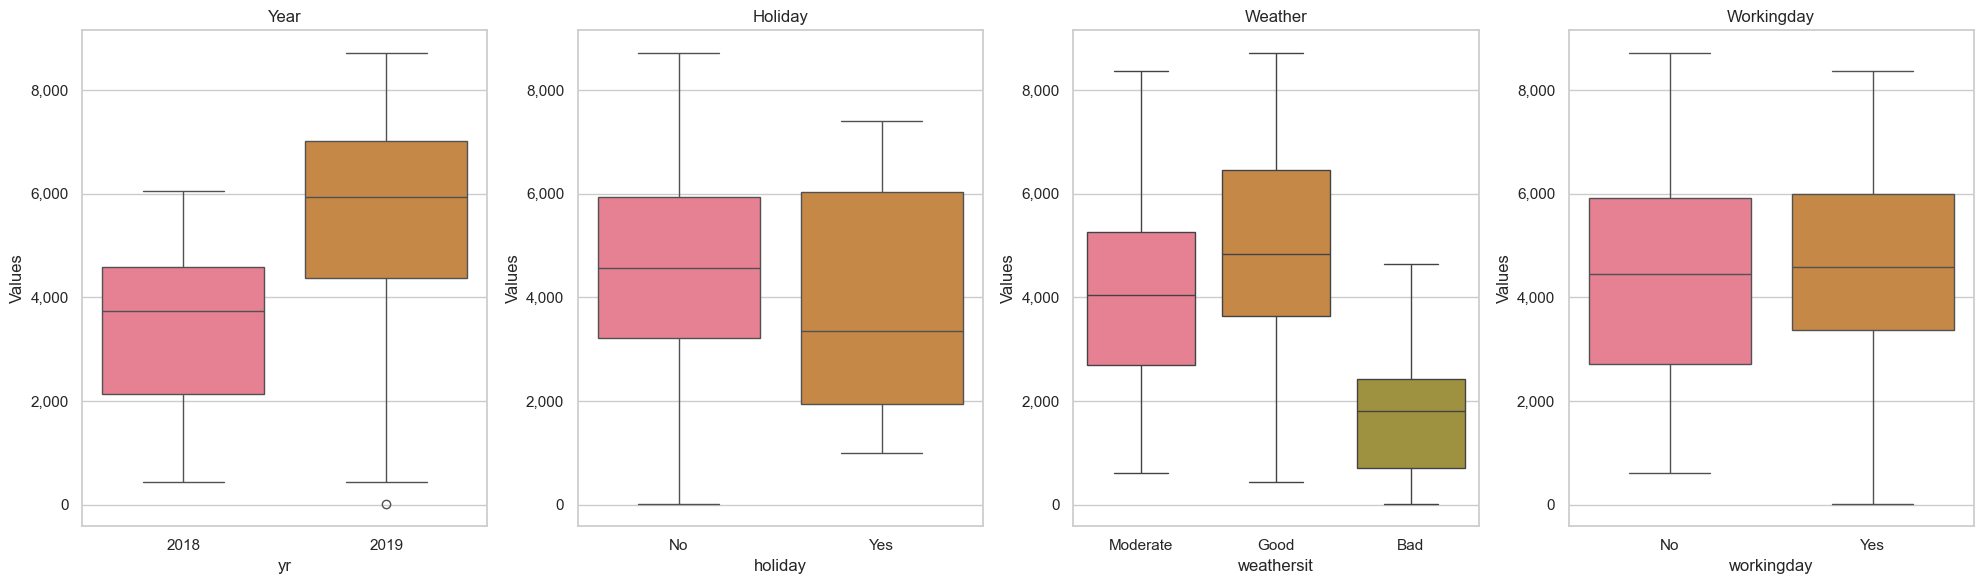

In [34]:
# Draw box plots for indepent variables with categorical values
cols = ['yr', 'holiday', 'weathersit', 'workingday']
title=['Year', 'Holiday', 'Weather', 'Workingday']
plt.figure(figsize=(20, 6))

# Set up the subplots in a single row
for i, col in enumerate(cols):
    plt.subplot(1, len(cols), i+1)  # 1 row, number of columns based on cols length
    create_boxplot(data=bike_data, x_column=col, y_column='cnt', title=title[i])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

<Figure size 1500x3000 with 0 Axes>

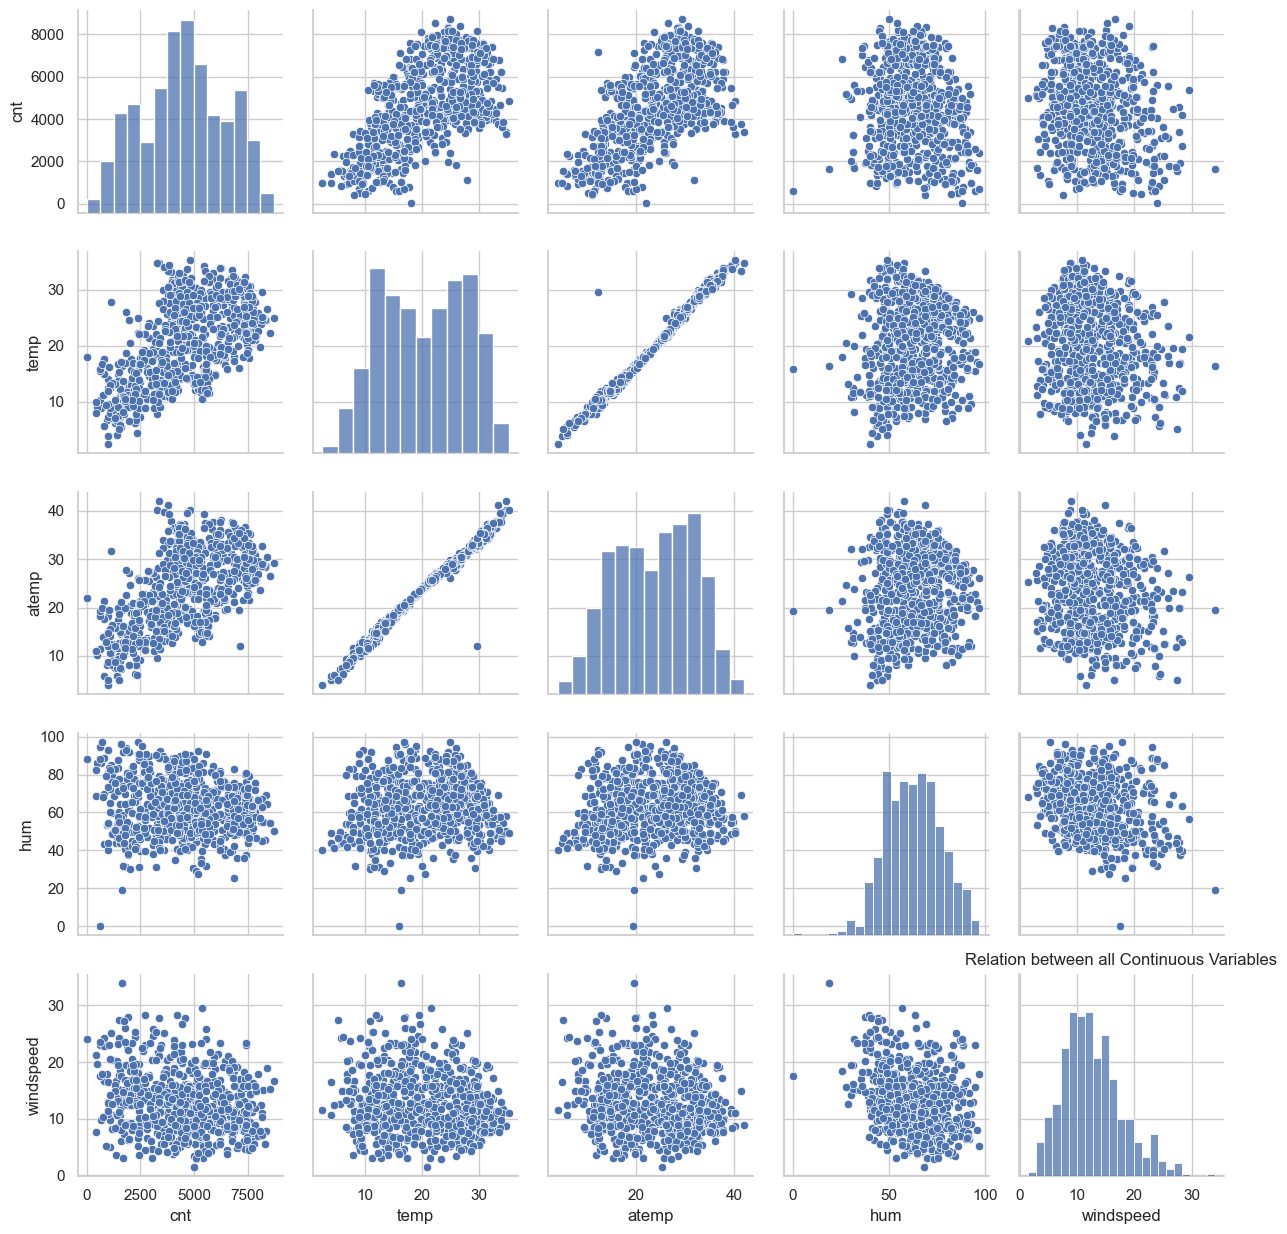

In [35]:
#Draw pairplots for continuous numeric variables using seaborn
plt.figure(figsize = (15,30))
sns.pairplot(data=bike_data, vars=['cnt', 'temp', 'atemp', 'hum','windspeed'], palette=palette)
plt.title("Relation between all Continuous Variables")
plt.tight_layout()
plt.show()

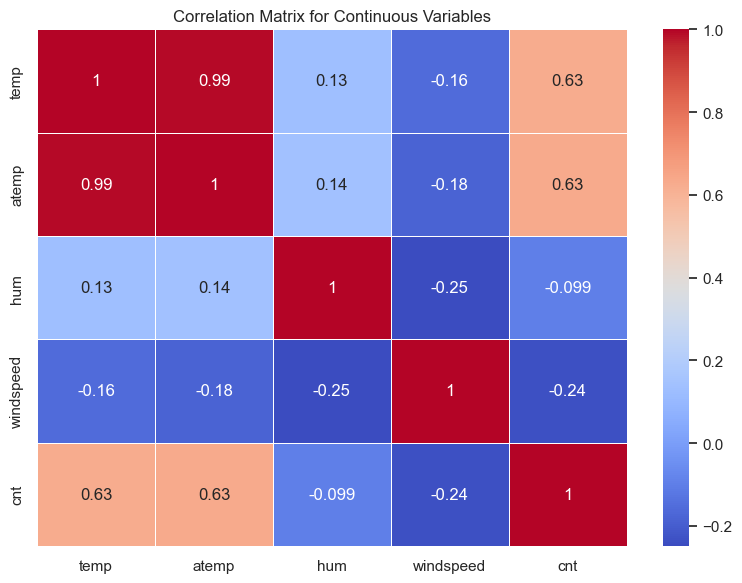

In [36]:
# Create the figure
plt.figure(figsize=(8, 6))

#Correlation Matrix for all continuous variables
create_heatmap(bike_data[['temp', 'atemp', 'hum', 'windspeed','cnt']].corr(), 'Correlation Matrix for Continuous Variables')

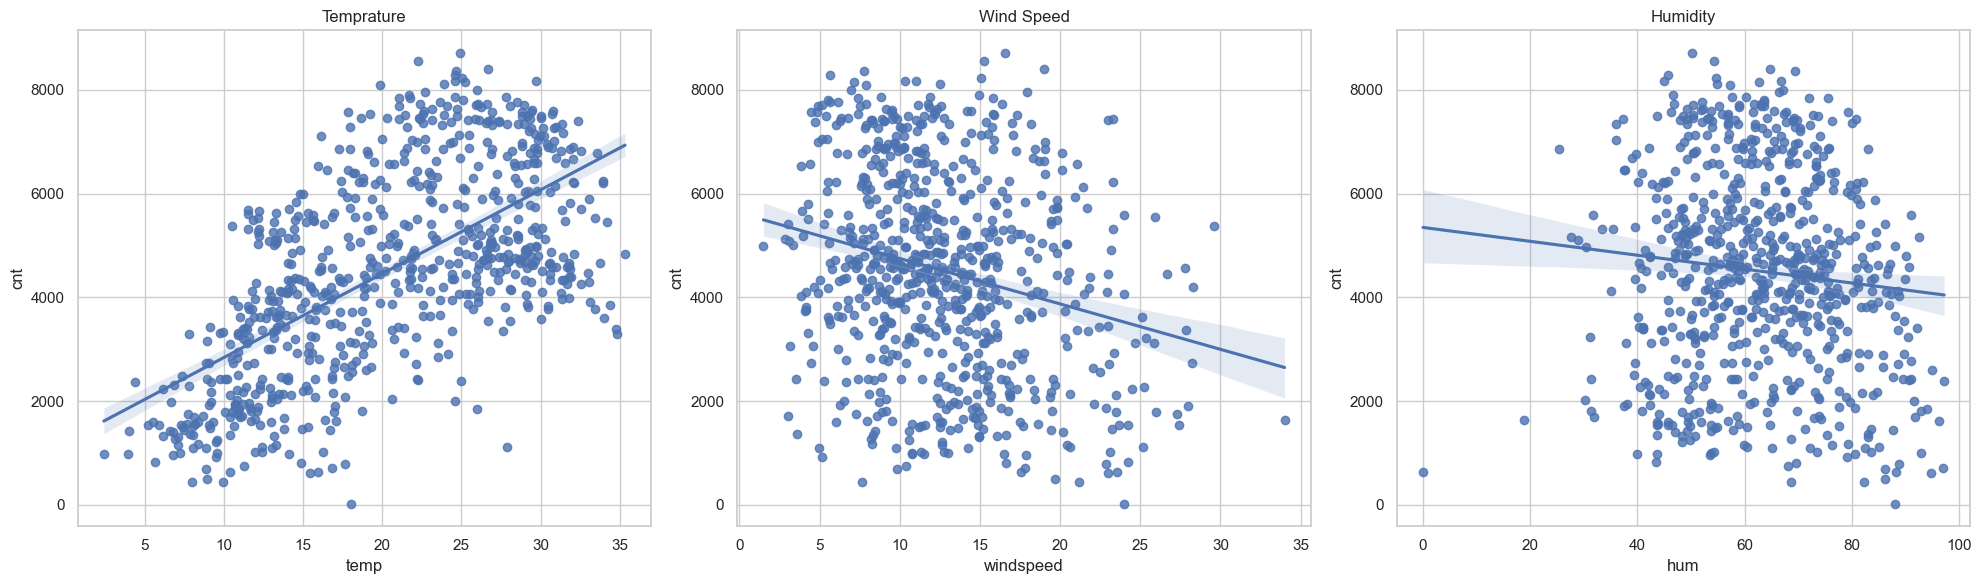

In [37]:
#Regression plot for all independent continuous variables
cols = ['temp', 'windspeed', 'hum']
title=['Temprature', 'Wind Speed', 'Humidity']
plt.figure(figsize=(20, 6))

# Set up the subplots in a single row
for i, col in enumerate(cols):
    plt.subplot(1, len(cols), i+1)  # 1 row, number of columns based on cols length
    create_regplot(data=bike_data, x_column=col, title=title[i])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

#### Insights

##### 1. Categorical Variables
- **Year**: In 2019, bike bookings experienced a remarkable **64% increase** compared to 2018, with the median number of bookings rising from **3,800** to **6,000**. 
- **Month**: Approximately **55% of bike bookings** occurred in May, June, July, August, and September, with a median exceeding **5,000 bookings per month**. This indicates a strong seasonal trend in demand.
- **Season**: Nearly **32% of bike bookings** took place in Fall, while Summer and Winter accounted for **27%** and **25%** of total bookings, respectively. This highlights the significance of seasonality in influencing bike usage.
- **Week Day**: Bookings showed consistent trends across weekdays, with each day contributing between **13.5% and 14.75%** of total bookings and medians ranging from **4,300 to 4,800**. This suggests a relatively stable demand pattern throughout the week.
- **Working Day**: Approximately **69% of bike bookings** occurred on working days, with a median around **4,500 bookings**. This indicates a strong preference for bike usage during weekdays.
- **Holiday**: A striking **97.6% of bike bookings** happened on non-holidays, indicating a significant bias in the data related to holiday periods.
- **Weather**: Around **68% of bike bookings** were made during good weather, with a median close to **5,000 bookings**. Additionally, approximately **30%** of bookings occurred during moderate weather, suggesting that weather conditions play a critical role in bike demand.le in bike demand.


##### 2. Continuous Variables
- **Windspeed** shows high variability, with a noticeable trend of **decreasing bookings as windspeed increases**. This suggests that higher wind speeds may negatively impact bike usage.
- **Humidity** shows high variability, with a noticeable trend of **decreasing bookings as humidity increases**. This suggests that more humidity may negatively impact bike usage.
- **Bike demand** is positively correlated with **temperature**, showing a clear linear trend where **bookings increase as temperature rises**. This suggests that warmer temperatures may drive higher bike usage.
- The pair plot indicates a **linear relationship** between **'temp,' 'atemp,'** and **'cnt,'** suggesting that as temperature rises, bike bookings also increase.
- Both **'temp'** and **'atemp'** show a strong correlation with the target variable **'cnt'** and are also highly correlated with each other, highlighting their significance as predictors of bike demand.

### 3. Data Preparation

In [38]:
bike_data_copy = bike_data
bike_data_copy.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,2018,Jan,No,Sat,No,Moderate,14.11,18.18,80.58,10.75,985
1,Spring,2018,Jan,No,Sun,No,Moderate,14.90,17.69,69.61,16.65,801
2,Spring,2018,Jan,No,Mon,Yes,Good,8.05,9.47,43.73,16.64,1349
3,Spring,2018,Jan,No,Tue,Yes,Good,8.20,10.61,59.04,10.74,1562
4,Spring,2018,Jan,No,Wed,Yes,Good,9.31,11.46,43.70,12.52,1600


In [39]:
#Replacing working day values to text
bike_data_copy.workingday.replace({'No': 0, 'Yes': 1},inplace = True)

#Replacing holiday values to text
bike_data_copy.holiday.replace({'No': 0, 'Yes': 1},inplace = True)

#Replacing year boolean values to years
bike_data_copy.yr.replace({2018: 0, 2019: 1},inplace = True)

In [40]:
#Creating Dummy variables for season, month, weekday and weather
bike_data_copy = pd.get_dummies(data=bike_data_copy,columns=["season","mnth","weekday"],drop_first=True)
bike_data_copy = pd.get_dummies(data=bike_data_copy,columns=["weathersit"])

In [41]:
print("Shape of Bike Data:", bike_data_copy.shape)
bike_data_copy.head()

Shape of Bike Data: (730, 31)


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Bad,weathersit_Good,weathersit_Moderate
0,0,0,0,14.11,18.18,80.58,10.75,985,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True
1,0,0,0,14.90,17.69,69.61,16.65,801,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True
2,0,0,1,8.05,9.47,43.73,16.64,1349,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False
3,0,0,1,8.20,10.61,59.04,10.74,1562,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False
4,0,0,1,9.31,11.46,43.70,12.52,1600,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False


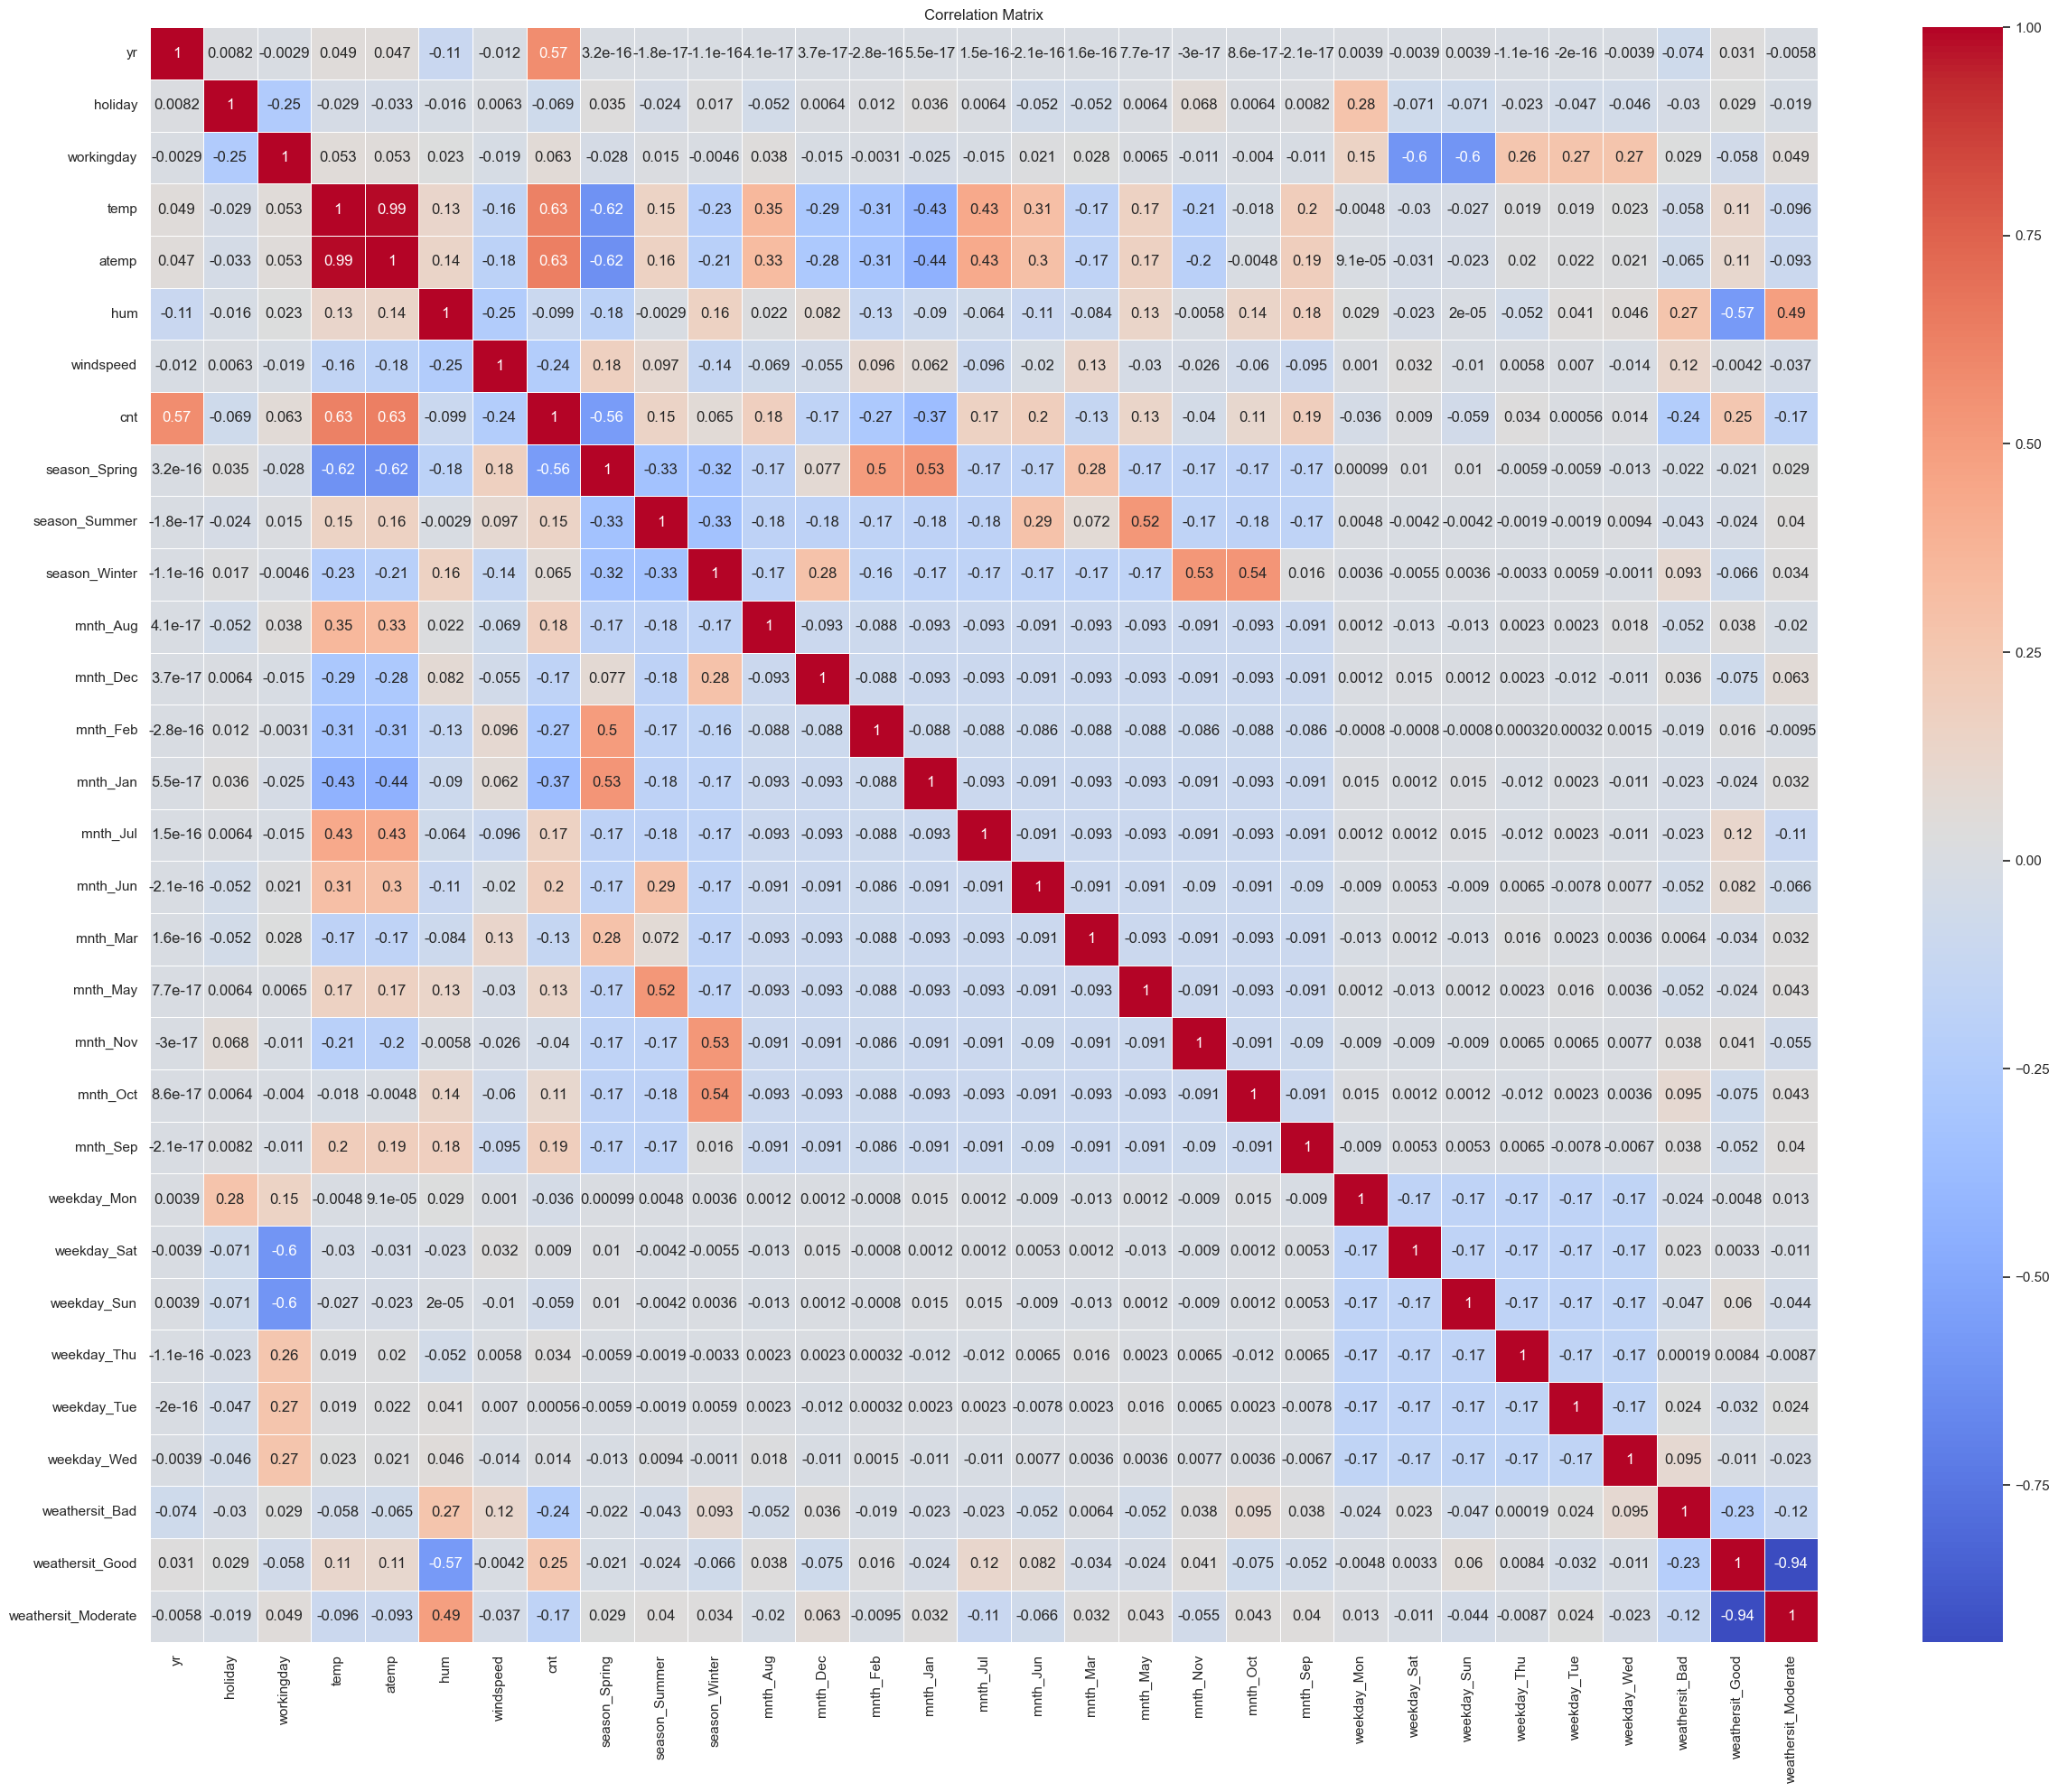

In [42]:
# Create the figure
plt.figure(figsize=(25, 20))

#Correlation Matrix for all variables
create_heatmap(bike_data_copy.corr(), 'Correlation Matrix')

### 4. Splitting the Data and Rescaling

In [43]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
bike_train, bike_test = train_test_split(bike_data_copy, train_size = 0.7, test_size = 0.3, random_state = 100)

In [44]:
scaler = MinMaxScaler()

In [45]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed']

bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])

In [46]:
print("Shape of Bike Training Data:", bike_train.shape)
bike_train.head()

Shape of Bike Training Data: (510, 31)


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Bad,weathersit_Good,weathersit_Moderate
653,1,0,1,0.51,0.50,0.58,0.30,7534,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False
576,1,0,1,0.82,0.77,0.73,0.26,7216,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False
426,1,0,0,0.44,0.44,0.64,0.26,4066,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True
728,1,0,0,0.25,0.20,0.50,0.66,1796,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False
482,1,0,0,0.40,0.39,0.50,0.19,4220,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True


In [47]:
bike_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00
mean,0.51,0.03,0.68,0.54,0.51,0.65,0.32,4486.38
std,0.50,0.16,0.47,0.23,0.21,0.15,0.17,1952.16
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.00
25%,0.00,0.00,0.00,0.34,0.33,0.54,0.20,3120.00
50%,1.00,0.00,1.00,0.54,0.53,0.65,0.30,4530.00
75%,1.00,0.00,1.00,0.74,0.69,0.75,0.41,5973.50
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,8714.00


In [48]:
print("Shape of Bike Test Data:", bike_test.shape)
bike_test.head()

Shape of Bike Test Data: (219, 31)


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Bad,weathersit_Good,weathersit_Moderate
184,0,1,0,29.79,33.27,63.79,5.46,6043,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True
535,1,0,1,32.08,36.05,59.21,7.63,6211,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False
299,0,0,1,19.27,22.85,81.29,13.25,2659,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True
221,0,0,1,31.43,34.25,42.42,13.42,4780,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False
152,0,0,1,29.32,32.20,30.50,19.58,4968,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False


In [49]:
bike_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00
mean,0.48,0.04,0.70,20.82,24.26,61.96,12.60,4546.98
std,0.50,0.19,0.46,7.69,8.30,14.46,4.98,1898.63
min,0.00,0.00,0.00,3.96,4.94,25.42,1.50,441.00
25%,0.00,0.00,0.00,14.09,17.09,51.17,9.02,3303.50
50%,0.00,0.00,1.00,20.81,24.87,60.92,12.17,4579.00
75%,1.00,0.00,1.00,27.40,31.16,72.19,15.40,5869.50
max,1.00,1.00,1.00,34.82,41.32,97.25,28.00,8395.00


In [50]:
y_train = bike_train.pop('cnt')
X_train = bike_train

### 5. Training the Model

In [51]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm,n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [52]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 8),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', False, 2),
 ('season_Winter', True, 1),
 ('mnth_Aug', False, 5),
 ('mnth_Dec', False, 7),
 ('mnth_Feb', False, 6),
 ('mnth_Jan', False, 4),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 11),
 ('mnth_Mar', False, 12),
 ('mnth_May', False, 14),
 ('mnth_Nov', False, 16),
 ('mnth_Oct', False, 3),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', False, 9),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', True, 1),
 ('weekday_Thu', False, 13),
 ('weekday_Tue', False, 10),
 ('weekday_Wed', False, 15),
 ('weathersit_Bad', True, 1),
 ('weathersit_Good', True, 1),
 ('weathersit_Moderate', True, 1)]

In [53]:
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_Spring', 'season_Winter', 'mnth_Jul', 'mnth_Sep', 'weekday_Sat',
       'weekday_Sun', 'weathersit_Bad', 'weathersit_Good',
       'weathersit_Moderate'],
      dtype='object')

In [54]:
X_train.columns[~rfe.support_]

Index(['atemp', 'season_Summer', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb',
       'mnth_Jan', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct',
       'weekday_Mon', 'weekday_Thu', 'weekday_Tue', 'weekday_Wed'],
      dtype='object')

In [55]:
selected_features = X_train.columns[rfe.support_]
X_train_rfe = X_train[selected_features]

X_train_rfe.shape

(510, 15)

#### Common Function for Model Building and VFI

In [56]:
#Function to build a model using statsmodel api - Takes the columns to be selected for model as a parameter
def build_model(X_train):
    # Add a constant
    X_train_sm = sm.add_constant(X_train.astype(float))
    
    # Create a first fitted model
    lm = sm.OLS(y_train, X_train_sm).fit()
    
    print(lm.summary())
    return lm

In [57]:
#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def get_vif(X_train):
    df1 = X_train.astype(float)
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [58]:
#Build a model with all columns to select features automatically
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

#### Model Building

#### Model-1

In [59]:
#Selected columns for Model 1 - all columns selected by RFE
build_model(X_train_rfe)
get_vif(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.6
Date:                Sun, 27 Oct 2024   Prob (F-statistic):          3.81e-190
Time:                        20:13:02   Log-Likelihood:                -4114.3
No. Observations:                 510   AIC:                             8257.
Df Residuals:                     496   BIC:                             8316.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1104.8340    

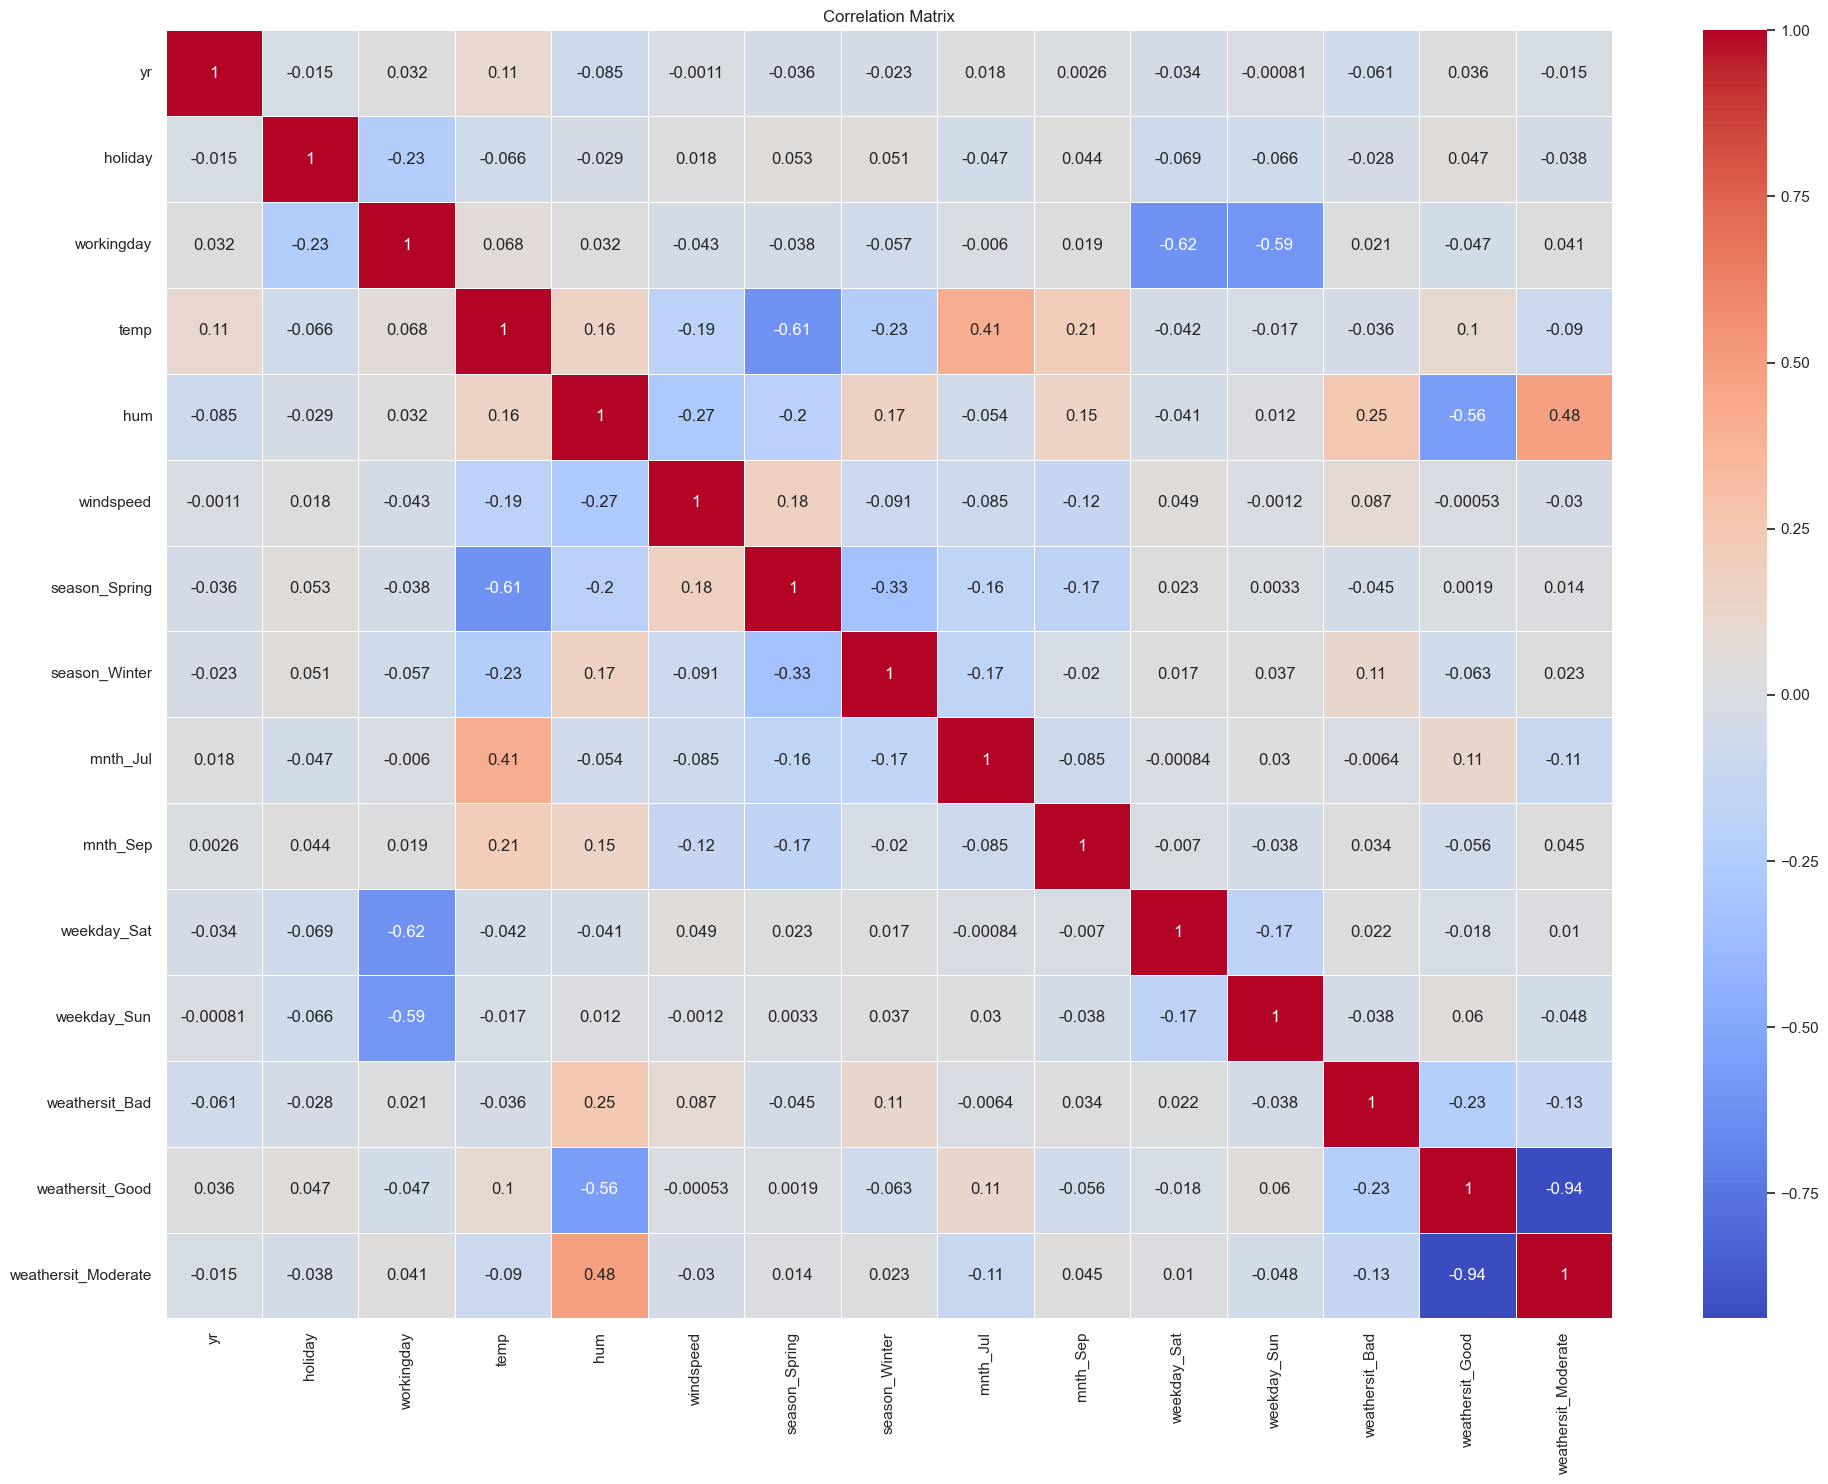

In [60]:
# Create the figure
plt.figure(figsize=(20, 15))

#Correlation Matrix for all variables
create_heatmap(X_train_rfe.corr(), 'Correlation Matrix')

#### Model-2

In [61]:
X_train_rfe = X_train_rfe.drop('weathersit_Good', axis=1)

build_model(X_train_rfe)
get_vif(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.6
Date:                Sun, 27 Oct 2024   Prob (F-statistic):          3.81e-190
Time:                        20:13:03   Log-Likelihood:                -4114.3
No. Observations:                 510   AIC:                             8257.
Df Residuals:                     496   BIC:                             8316.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2119.4960    

#### Model-3

In [62]:
X_train_rfe = X_train_rfe.drop('workingday', axis=1)

build_model(X_train_rfe)
get_vif(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.6
Date:                Sun, 27 Oct 2024   Prob (F-statistic):          3.81e-190
Time:                        20:13:03   Log-Likelihood:                -4114.3
No. Observations:                 510   AIC:                             8257.
Df Residuals:                     496   BIC:                             8316.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2945.5796    

#### Model-4

In [63]:
X_train_rfe = X_train_rfe.drop('hum', axis=1)

build_model(X_train_rfe)
get_vif(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     215.3
Date:                Sun, 27 Oct 2024   Prob (F-statistic):          4.38e-188
Time:                        20:13:03   Log-Likelihood:                -4122.0
No. Observations:                 510   AIC:                             8270.
Df Residuals:                     497   BIC:                             8325.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2260.5034    

#### Model-5

In [64]:
X_train_rfe = X_train_rfe.drop('weekday_Sat', axis=1)

build_model(X_train_rfe)
get_vif(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     234.8
Date:                Sun, 27 Oct 2024   Prob (F-statistic):          4.60e-189
Time:                        20:13:03   Log-Likelihood:                -4122.5
No. Observations:                 510   AIC:                             8269.
Df Residuals:                     498   BIC:                             8320.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2279.2127    

#### Model-6

In [65]:
X_train_rfe = X_train_rfe.drop('windspeed', axis=1)

build_model(X_train_rfe)
get_vif(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     240.3
Date:                Sun, 27 Oct 2024   Prob (F-statistic):          1.33e-183
Time:                        20:13:03   Log-Likelihood:                -4138.3
No. Observations:                 510   AIC:                             8299.
Df Residuals:                     499   BIC:                             8345.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1775.7043    

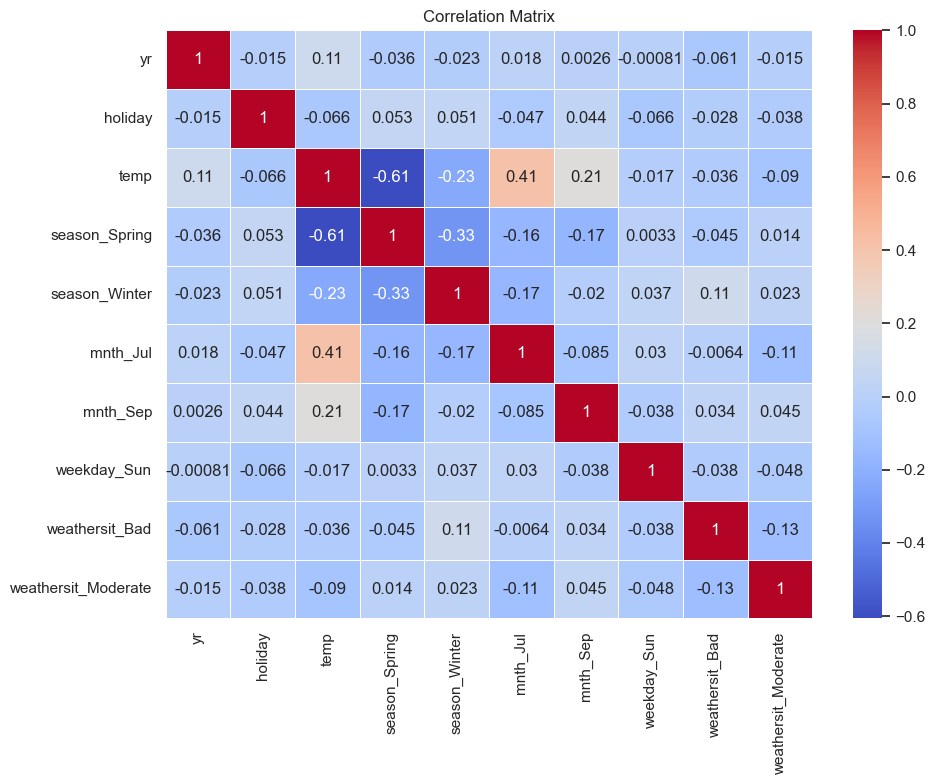

In [66]:
# Create the figure
plt.figure(figsize=(10, 8))

#Correlation Matrix for all variables
create_heatmap(X_train_rfe.corr(), 'Correlation Matrix')

In [67]:
#Build a model with above columns
lr = build_model_sk(X_train_rfe,y_train)
print(lr.intercept_,lr.coef_)

1775.7042790114783 [ 2024.72593494  -945.46684726  4083.83718192  -957.27959171
   503.02191858  -577.48803076   560.73052057  -417.46591358
 -2655.0056988   -708.58895472]


### 6. Residual Analysis

In [68]:
y_train_pred = lr.predict(X_train_rfe)

Text(0.5, 0, 'Errors')

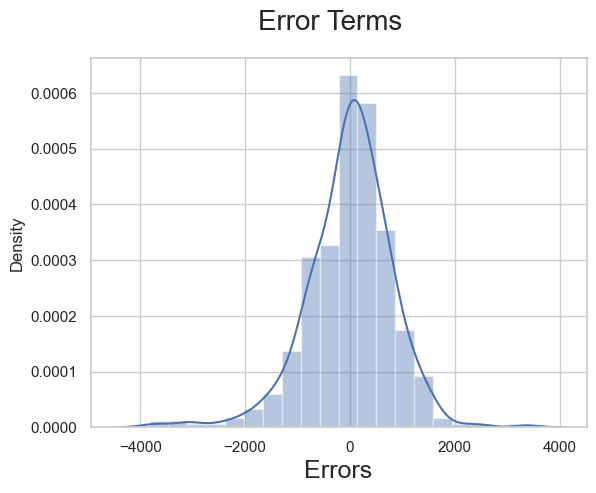

In [69]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

In [70]:
#Print R-squared Value
r2_score(y_train,y_train_pred)

0.8280609908327203

### 7. Making Predictions

In [71]:
bike_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Bad,weathersit_Good,weathersit_Moderate
184,0,1,0,29.79,33.27,63.79,5.46,6043,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True
535,1,0,1,32.08,36.05,59.21,7.63,6211,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False
299,0,0,1,19.27,22.85,81.29,13.25,2659,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True
221,0,0,1,31.43,34.25,42.42,13.42,4780,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False
152,0,0,1,29.32,32.20,30.50,19.58,4968,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False


In [72]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed']

bike_test[num_vars] = scaler.transform(bike_test[num_vars])

In [73]:
bike_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00
mean,0.48,0.04,0.70,0.56,0.53,0.64,0.31,4546.98
std,0.50,0.19,0.46,0.23,0.22,0.15,0.16,1898.63
min,0.00,0.00,0.00,0.05,0.03,0.26,-0.04,441.00
25%,0.00,0.00,0.00,0.35,0.34,0.53,0.20,3303.50
50%,0.00,0.00,1.00,0.56,0.55,0.63,0.30,4579.00
75%,1.00,0.00,1.00,0.76,0.71,0.74,0.40,5869.50
max,1.00,1.00,1.00,0.98,0.98,1.00,0.81,8395.00


In [74]:
y_test = bike_test.pop('cnt')
X_test = bike_test

In [75]:
selected_feature = X_train_rfe.columns
X_test_lm = X_test[selected_feature]
X_test_lm.shape

(219, 10)

In [76]:
#Predict the values for test data
y_test_pred = lr.predict(X_test_lm)


### 8. Model Valuation

In [77]:
# Find out the R squared value between test and predicted test data sets.  
r2_score(y_test,y_test_pred)

0.8114452236660381

Text(0, 0.5, 'y_pred')

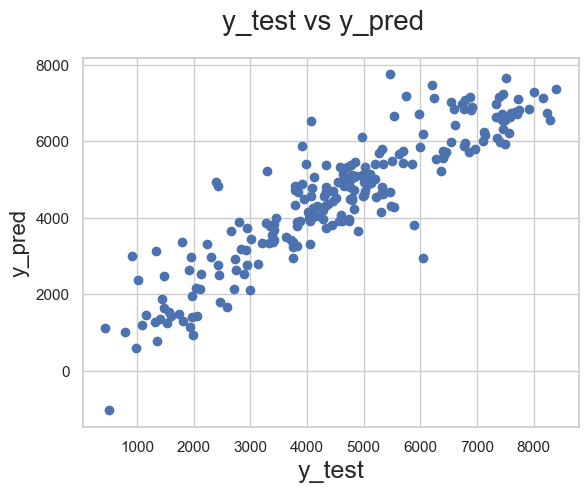

In [78]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  